# Monte Carlo Comparisons 
This is for compairing my code to Monte Carlo.

In [51]:
%pylab ipympl
import pickle
import imshow_slider as ims
from topas2numpy import BinnedResult

Populating the interactive namespace from numpy and matplotlib


In [80]:
my_dose_array = pickle.load(open('dose_3.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

Text(0.5, 1.0, 'My Code')

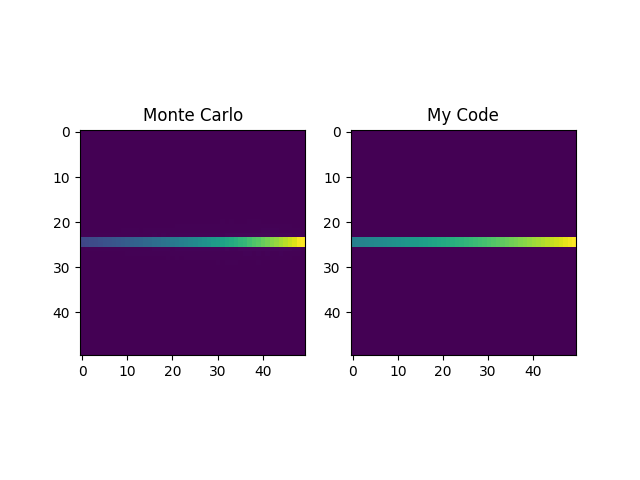

In [112]:
x = 25

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca())
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10/1.1102947211646792)))
title('Monte Carlo')

subplot(1,2,2,sharex=gca(), sharey=gca())
imshow(my_dose_array[x]*1.602e-10,vmin=0,vmax=np.max((my_dose_array*1.602e-10)))
# imshow(my_dose_array[x]*1.602e-10/1.1102947211646792,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10/1.1102947211646792)))
title('My Code')

# savefig('GOOD_WATER.png')


In [107]:
mean((my_dose_array.flatten()*1.602e-10/mc_dose_array.flatten())[where(my_dose_array.flatten()*1.602e-10/mc_dose_array.flatten() != 0)[0]])



1.1102947211646792

In [86]:
np.sum(mc_dose_array)

0.005768267103529234

In [87]:
np.sum(my_dose_array)*1.602e-10

0.03482997154775037